# Evaluación Práctica 1
> **Fecha de entrega:** Viernes 13 de junio de 2025, 22:00
>
> **Nombre estudiante 1:** Fernando Canales Pérez
>

---

## Instrucciones Importantes
- Complete todas las secciones marcadas con `# TODO`
- No borre las salidas de las celdas una vez ejecutadas
- Este notebook debe ejecutarse de inicio a fin sin errores
- Incluya comentarios explicativos en su código
- Justifique todas sus decisiones analíticas

## Instalación de Dependencias
**Ejecute esta celda primero para instalar todas las librerías necesarias**

In [ ]:
# Instalación de dependencias
!pip install pandas numpy matplotlib seaborn scikit-learn umap-learn

## Importación de Librerías

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP


In [70]:
import random
import numpy as np

# Para reproducibilidad
RNG_SEED = 42

random.seed(RNG_SEED)
np.random.seed(RNG_SEED)

---
# Fase 1: Preparación y Exploración de Datos (3 pts.)

## Pregunta 1: Selección y descarga de dataset [1 pts.]

**Requisitos del dataset:**
- Al menos 10 columnas (incluyendo la variable objetivo)
- Al menos 100 filas
- Columnas numéricas y categóricas
- Una columna que pueda ser usada como variable objetivo

### 1.1 Descripción del Dataset Elegido


**Nombre del dataset**

> kaggle house prices - advanced regression techniques

**Fuente**

> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**🏡 Descripción de columnas del dataset de viviendas**

| Columna                        | Descripción                                                               |
| ------------------------------ | ------------------------------------------------------------------------- |
| `Id`                           | Identificador único de la propiedad.                                      |
| `ClaseConstruccion`            | Calidad o clase de la construcción según materiales o estándares.         |
| `Zonificacion`                 | Clasificación urbanística de la propiedad (residencial, comercial, etc.). |
| `FrenteLote`                   | Longitud del frente del terreno en pies.                                  |
| `AreaLote`                     | Área total del terreno en pies cuadrados.                                 |
| `TipoCalle`                    | Tipo de calle frente a la propiedad (pavimentada, grava, etc.).           |
| `Callejon`                     | Presencia o tipo de acceso trasero (callejón).                            |
| `FormaLote`                    | Forma general del lote (regular, irregular, etc.).                        |
| `ContornoTerreno`              | Relación de la propiedad con otras (esquina, interior, etc.).             |
| `Servicios`                    | Servicios públicos disponibles (agua, luz, etc.).                         |
| `ConfiguracionLote`            | Posición de la casa respecto al lote (adjunta, aislada, etc.).            |
| `PendienteTerreno`             | Inclinación del terreno (plano, leve pendiente, etc.).                    |
| `Barrio`                       | Nombre del barrio o vecindario.                                           |
| `Condicion1`                   | Condición principal de proximidad (junto a vía, río, etc.).               |
| `Condicion2`                   | Segunda condición de proximidad si aplica.                                |
| `TipoEdificio`                 | Tipo general del edificio (unifamiliar, dúplex, etc.).                    |
| `EstiloCasa`                   | Estilo arquitectónico (colonial, moderno, etc.).                          |
| `CalidadGeneral`               | Calidad general de los materiales y acabados (escala ordinal).            |
| `CondicionGeneral`             | Estado general de conservación de la propiedad.                           |
| `AnioConstruccion`             | Año original de construcción.                                             |
| `AnioRemodelacion`             | Año de la última renovación importante.                                   |
| `EstiloTecho`                  | Forma o estructura del techo (a dos aguas, plano, etc.).                  |
| `MaterialTecho`                | Material de recubrimiento del techo.                                      |
| `Exterior1`                    | Acabado exterior principal.                                               |
| `Exterior2`                    | Segundo tipo de acabado exterior si aplica.                               |
| `TipoRevestimientoMamposteria` | Tipo de revestimiento sobre muros de mampostería.                         |
| `AreaRevestimientoMamposteria` | Área cubierta con dicho revestimiento.                                    |
| `CalidadExterior`              | Calidad del material exterior.                                            |
| `CondicionExterior`            | Estado físico de los materiales exteriores.                               |
| `Cimentacion`                  | Tipo de cimiento de la vivienda.                                          |
| `CalidadSotano`                | Calidad del sótano (si existe).                                           |
| `CondicionSotano`              | Condición estructural del sótano.                                         |
| `ExposicionSotano`             | Nivel de exposición del sótano (ventanas, luz, etc.).                     |
| `TipoFinSotano1`               | Tipo de terminación del sótano (zona 1).                                  |
| `AreaFinSotano1`               | Área terminada del sótano zona 1.                                         |
| `TipoFinSotano2`               | Tipo de terminación del sótano (zona 2).                                  |
| `AreaFinSotano2`               | Área terminada del sótano zona 2.                                         |
| `AreaSotanoNoFinalizado`       | Área sin terminar del sótano.                                             |
| `AreaTotalSotano`              | Área total del sótano (terminado + no terminado).                         |
| `SistemaCalefaccion`           | Tipo de sistema de calefacción.                                           |
| `CalidadCalefaccion`           | Calidad del sistema de calefacción.                                       |
| `AireAcondicionadoCentral`     | Presencia de aire acondicionado central.                                  |
| `SistemaElectrico`             | Tipo de sistema eléctrico instalado.                                      |
| `AreaPrimerPiso`               | Área del primer piso.                                                     |
| `AreaSegundoPiso`              | Área del segundo piso.                                                    |
| `AreaBajaCalidad`              | Área habitable considerada de baja calidad.                               |
| `AreaHabitable`                | Área total habitable de la casa.                                          |
| `BaniosCompletosSotano`        | Número de baños completos en el sótano.                                   |
| `MediosBaniosSotano`           | Número de medios baños en el sótano.                                      |
| `BaniosCompletos`              | Número de baños completos en el resto de la casa.                         |
| `MediosBanios`                 | Número de medios baños (sin ducha/bañera).                                |
| `Dormitorios`                  | Número total de dormitorios.                                              |
| `Cocinas`                      | Número de cocinas.                                                        |
| `CalidadCocina`                | Calidad de los materiales y diseño de cocina.                             |
| `TotalHabitaciones`            | Total de habitaciones (excluye baños y cocina).                           |
| `Funcionamiento`               | Nivel de funcionalidad de la casa (normal, reducido, etc.).               |
| `Chimeneas`                    | Número de chimeneas.                                                      |
| `CalidadChimenea`              | Calidad o tipo de la chimenea.                                            |
| `TipoGarage`                   | Tipo de garaje (adjunto, separado, sin garaje, etc.).                     |
| `AnioGarage`                   | Año de construcción del garaje.                                           |
| `TerminacionGarage`            | Nivel de terminación del garaje.                                          |
| `CapacidadGarage`              | Número de autos que caben en el garaje.                                   |
| `AreaGarage`                   | Área total del garaje.                                                    |
| `CalidadGarage`                | Calidad de construcción del garaje.                                       |
| `CondicionGarage`              | Condición actual del garaje.                                              |
| `EntradaPavimentada`           | Indica si la entrada está pavimentada.                                    |
| `AreaDeckMadera`               | Área del deck de madera.                                                  |
| `AreaPorcheAbierto`            | Área de porche abierto.                                                   |
| `AreaPorcheCerrado`            | Área de porche cerrado.                                                   |
| `AreaPorche3Estaciones`        | Porche habilitado para 3 estaciones del año.                              |
| `AreaPorcheMosquitero`         | Porche con mosquitero.                                                    |
| `AreaPiscina`                  | Área destinada a piscina.                                                 |
| `CalidadPiscina`               | Calidad de la piscina.                                                    |
| `Cerca`                        | Presencia y tipo de cerca.                                                |
| `CaracteristicasMiscelaneas`   | Características adicionales (cobertizo, torre, etc.).                     |
| `ValorMiscelaneo`              | Valor estimado de las características misceláneas.                        |
| `MesVenta`                     | Mes de venta de la propiedad.                                             |
| `AnioVenta`                    | Año de venta de la propiedad.                                             |
| `TipoVenta`                    | Tipo de transacción (normal, heredada, etc.).                             |
| `CondicionVenta`               | Condición en la que se vendió (urgente, normal, etc.).                    |
| `PrecioVenta`                  | Precio final de venta.                                                    |


### 🎯 Tarea de predicción
La tarea principal es **predecir el precio de venta de una propiedad residencial** en función de sus características estructurales, ubicación, estado de conservación, y condiciones externas.

* 📌 Variable objetivo: PrecioVenta

* 🏠 Variables predictoras: características del inmueble como AreaHabitable, Barrio, CalidadGeneral, AnioConstruccion, TipoGarage, entre muchas otras.

🔍 Esta tarea es relevante porque permite:

* Estimar el valor real de una vivienda antes de ponerla en venta o compra.

* Asistir a agentes inmobiliarios en fijación de precios.

* Automatizar procesos de valuación para instituciones financieras o aseguradoras.

* Detectar propiedades subvaluadas o sobrevaluadas en el mercado.

### 📊 Tipo de problema
El tipo de problema que se está abordando es un:

> Problema de regresión supervisada

**Características del problema:**
* La variable a predecir (PrecioVenta) es continua y numérica.

* Se dispone de ejemplos etiquetados (conocemos el precio real de venta para cada observación).

* Se entrenará un modelo utilizando estos datos históricos para generalizar a nuevos casos.

#### 🔍 ¿Por qué es relevante predecir el PrecioVenta?
Predecir el precio de venta de propiedades es una tarea central en modelos de valoración inmobiliaria, con múltiples aplicaciones prácticas:

**✅ 1. Toma de decisiones para compradores y vendedores**
* Compradores pueden identificar si una propiedad está sobrevalorada.
* Vendedores pueden ajustar precios en función de propiedades similares.

**✅ 2. Análisis de mercado y estrategia de precios**
* Las inmobiliarias pueden usar modelos para definir precios de salida competitivos.
* Ayuda a detectar patrones de sobrevaloración o infravaloración según ubicación, tamaño, estado, etc.

**✅ 3. Aplicación en impuestos, seguros y financiamiento**
* Los bancos pueden estimar garantías hipotecarias.
* Las aseguradoras ajustan coberturas en función del valor estimado.
* Los municipios pueden usarlo como base para calcular impuestos

### 1.2 Descarga Programática del Dataset

In [102]:
import pandas as pd

url = "https://raw.githubusercontent.com/fperezcanales/house-prices-advanced-regression-techniques/eda/train.csv"
df = pd.read_csv(url)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1.3 Carga del Dataset

In [104]:
# Completar
# para un mejor comprension de las variables renombramos las columnas a español 
columnas_es = {
    'Id': 'Id',
    'MSSubClass': 'ClaseConstruccion',
    'MSZoning': 'Zonificacion',
    'LotFrontage': 'FrenteLote',
    'LotArea': 'AreaLote',
    'Street': 'TipoCalle',
    'Alley': 'Callejon',
    'LotShape': 'FormaLote',
    'LandContour': 'ContornoTerreno',
    'Utilities': 'Servicios',
    'LotConfig': 'ConfiguracionLote',
    'LandSlope': 'PendienteTerreno',
    'Neighborhood': 'Barrio',
    'Condition1': 'Condicion1',
    'Condition2': 'Condicion2',
    'BldgType': 'TipoEdificio',
    'HouseStyle': 'EstiloCasa',
    'OverallQual': 'CalidadGeneral',
    'OverallCond': 'CondicionGeneral',
    'YearBuilt': 'AnioConstruccion',
    'YearRemodAdd': 'AnioRemodelacion',
    'RoofStyle': 'EstiloTecho',
    'RoofMatl': 'MaterialTecho',
    'Exterior1st': 'Exterior1',
    'Exterior2nd': 'Exterior2',
    'MasVnrType': 'TipoRevestimientoMamposteria',
    'MasVnrArea': 'AreaRevestimientoMamposteria',
    'ExterQual': 'CalidadExterior',
    'ExterCond': 'CondicionExterior',
    'Foundation': 'Cimentacion',
    'BsmtQual': 'CalidadSotano',
    'BsmtCond': 'CondicionSotano',
    'BsmtExposure': 'ExposicionSotano',
    'BsmtFinType1': 'TipoFinSotano1',
    'BsmtFinSF1': 'AreaFinSotano1',
    'BsmtFinType2': 'TipoFinSotano2',
    'BsmtFinSF2': 'AreaFinSotano2',
    'BsmtUnfSF': 'AreaSotanoNoFinalizado',
    'TotalBsmtSF': 'AreaTotalSotano',
    'Heating': 'SistemaCalefaccion',
    'HeatingQC': 'CalidadCalefaccion',
    'CentralAir': 'AireAcondicionadoCentral',
    'Electrical': 'SistemaElectrico',
    '1stFlrSF': 'AreaPrimerPiso',
    '2ndFlrSF': 'AreaSegundoPiso',
    'LowQualFinSF': 'AreaBajaCalidad',
    'GrLivArea': 'AreaHabitable',
    'BsmtFullBath': 'BaniosCompletosSotano',
    'BsmtHalfBath': 'MediosBaniosSotano',
    'FullBath': 'BaniosCompletos',
    'HalfBath': 'MediosBanios',
    'BedroomAbvGr': 'Dormitorios',
    'KitchenAbvGr': 'Cocinas',
    'KitchenQual': 'CalidadCocina',
    'TotRmsAbvGrd': 'TotalHabitaciones',
    'Functional': 'Funcionamiento',
    'Fireplaces': 'Chimeneas',
    'FireplaceQu': 'CalidadChimenea',
    'GarageType': 'TipoGarage',
    'GarageYrBlt': 'AnioGarage',
    'GarageFinish': 'TerminacionGarage',
    'GarageCars': 'CapacidadGarage',
    'GarageArea': 'AreaGarage',
    'GarageQual': 'CalidadGarage',
    'GarageCond': 'CondicionGarage',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'AreaDeckMadera',
    'OpenPorchSF': 'AreaPorcheAbierto',
    'EnclosedPorch': 'AreaPorcheCerrado',
    '3SsnPorch': 'AreaPorche3Estaciones',
    'ScreenPorch': 'AreaPorcheMosquitero',
    'PoolArea': 'AreaPiscina',
    'PoolQC': 'CalidadPiscina',
    'Fence': 'Cerca',
    'MiscFeature': 'CaracteristicasMiscelaneas',
    'MiscVal': 'ValorMiscelaneo',
    'MoSold': 'MesVenta',
    'YrSold': 'AnioVenta',
    'SaleType': 'TipoVenta',
    'SaleCondition': 'CondicionVenta',
    'SalePrice': 'PrecioVenta'
}
df.rename(columns=columnas_es, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            1460 non-null   int64  
 1   ClaseConstruccion             1460 non-null   int64  
 2   Zonificacion                  1460 non-null   object 
 3   FrenteLote                    1201 non-null   float64
 4   AreaLote                      1460 non-null   int64  
 5   TipoCalle                     1460 non-null   object 
 6   Callejon                      91 non-null     object 
 7   FormaLote                     1460 non-null   object 
 8   ContornoTerreno               1460 non-null   object 
 9   Servicios                     1460 non-null   object 
 10  ConfiguracionLote             1460 non-null   object 
 11  PendienteTerreno              1460 non-null   object 
 12  Barrio                        1460 non-null   object 
 13  Con

## Pregunta 2: Análisis de columnas [1.5 pts.]

**Requisitos:**
- Listar cada columna con su tipo de dato
- Describir qué representa cada columna
- Incluir al menos 3 gráficos con análisis no trivial
- Describir conclusiones de cada gráfico

In [111]:
df.columns

Index(['Id', 'ClaseConstruccion', 'Zonificacion', 'FrenteLote', 'AreaLote',
       'TipoCalle', 'Callejon', 'FormaLote', 'ContornoTerreno', 'Servicios',
       'ConfiguracionLote', 'PendienteTerreno', 'Barrio', 'Condicion1',
       'Condicion2', 'TipoEdificio', 'EstiloCasa', 'CalidadGeneral',
       'CondicionGeneral', 'AnioConstruccion', 'AnioRemodelacion',
       'EstiloTecho', 'MaterialTecho', 'Exterior1', 'Exterior2',
       'TipoRevestimientoMamposteria', 'AreaRevestimientoMamposteria',
       'CalidadExterior', 'CondicionExterior', 'Cimentacion', 'CalidadSotano',
       'CondicionSotano', 'ExposicionSotano', 'TipoFinSotano1',
       'AreaFinSotano1', 'TipoFinSotano2', 'AreaFinSotano2',
       'AreaSotanoNoFinalizado', 'AreaTotalSotano', 'SistemaCalefaccion',
       'CalidadCalefaccion', 'AireAcondicionadoCentral', 'SistemaElectrico',
       'AreaPrimerPiso', 'AreaSegundoPiso', 'AreaBajaCalidad', 'AreaHabitable',
       'BaniosCompletosSotano', 'MediosBaniosSotano', 'BaniosComplet

Respuesta

In [108]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas categóricas: {len(cat_cols)}")
print(df.select_dtypes(include='object').columns)
print(f"Columnas numéricas: {len(num_cols)}")
print( df.select_dtypes(include=['int64', 'float64']).columns)

Columnas categóricas: 43
Index(['Zonificacion', 'TipoCalle', 'Callejon', 'FormaLote', 'ContornoTerreno',
       'Servicios', 'ConfiguracionLote', 'PendienteTerreno', 'Barrio',
       'Condicion1', 'Condicion2', 'TipoEdificio', 'EstiloCasa', 'EstiloTecho',
       'MaterialTecho', 'Exterior1', 'Exterior2',
       'TipoRevestimientoMamposteria', 'CalidadExterior', 'CondicionExterior',
       'Cimentacion', 'CalidadSotano', 'CondicionSotano', 'ExposicionSotano',
       'TipoFinSotano1', 'TipoFinSotano2', 'SistemaCalefaccion',
       'CalidadCalefaccion', 'AireAcondicionadoCentral', 'SistemaElectrico',
       'CalidadCocina', 'Funcionamiento', 'CalidadChimenea', 'TipoGarage',
       'TerminacionGarage', 'CalidadGarage', 'CondicionGarage',
       'EntradaPavimentada', 'CalidadPiscina', 'Cerca',
       'CaracteristicasMiscelaneas', 'TipoVenta', 'CondicionVenta'],
      dtype='object')
Columnas numéricas: 38
Index(['Id', 'ClaseConstruccion', 'FrenteLote', 'AreaLote', 'CalidadGeneral',
       '

**1. Análisis EDA - Primeros gráficos de histograma y boxplots para Variables Numéricas**

Conclusiones a partir de histogramas y boxplots
1. Distribuciones sesgadas hacia la derecha
* Muchas variables numericas como PrecioVenta, AreaLote, AreaHabitable, AreaGarage, etc presentan alta concentracion de valores bajos y cola larga hacia la dreceha.
*  Esto suguiere que la mayoria de las propiedades tienen valores moderados, pero hay algunas con valores mucho mas altos que el promedio.

2. Boxplots con bigotes derechos cargados de puntos
* Se observa una gran cantidad de puntos fuera del bigote, lo cual siguiere presencia de outliers altos.
* Aun que algunos podrían ser errores, en este contexto inmobiliario es más probable que sean propiedades grandes o de lujos.


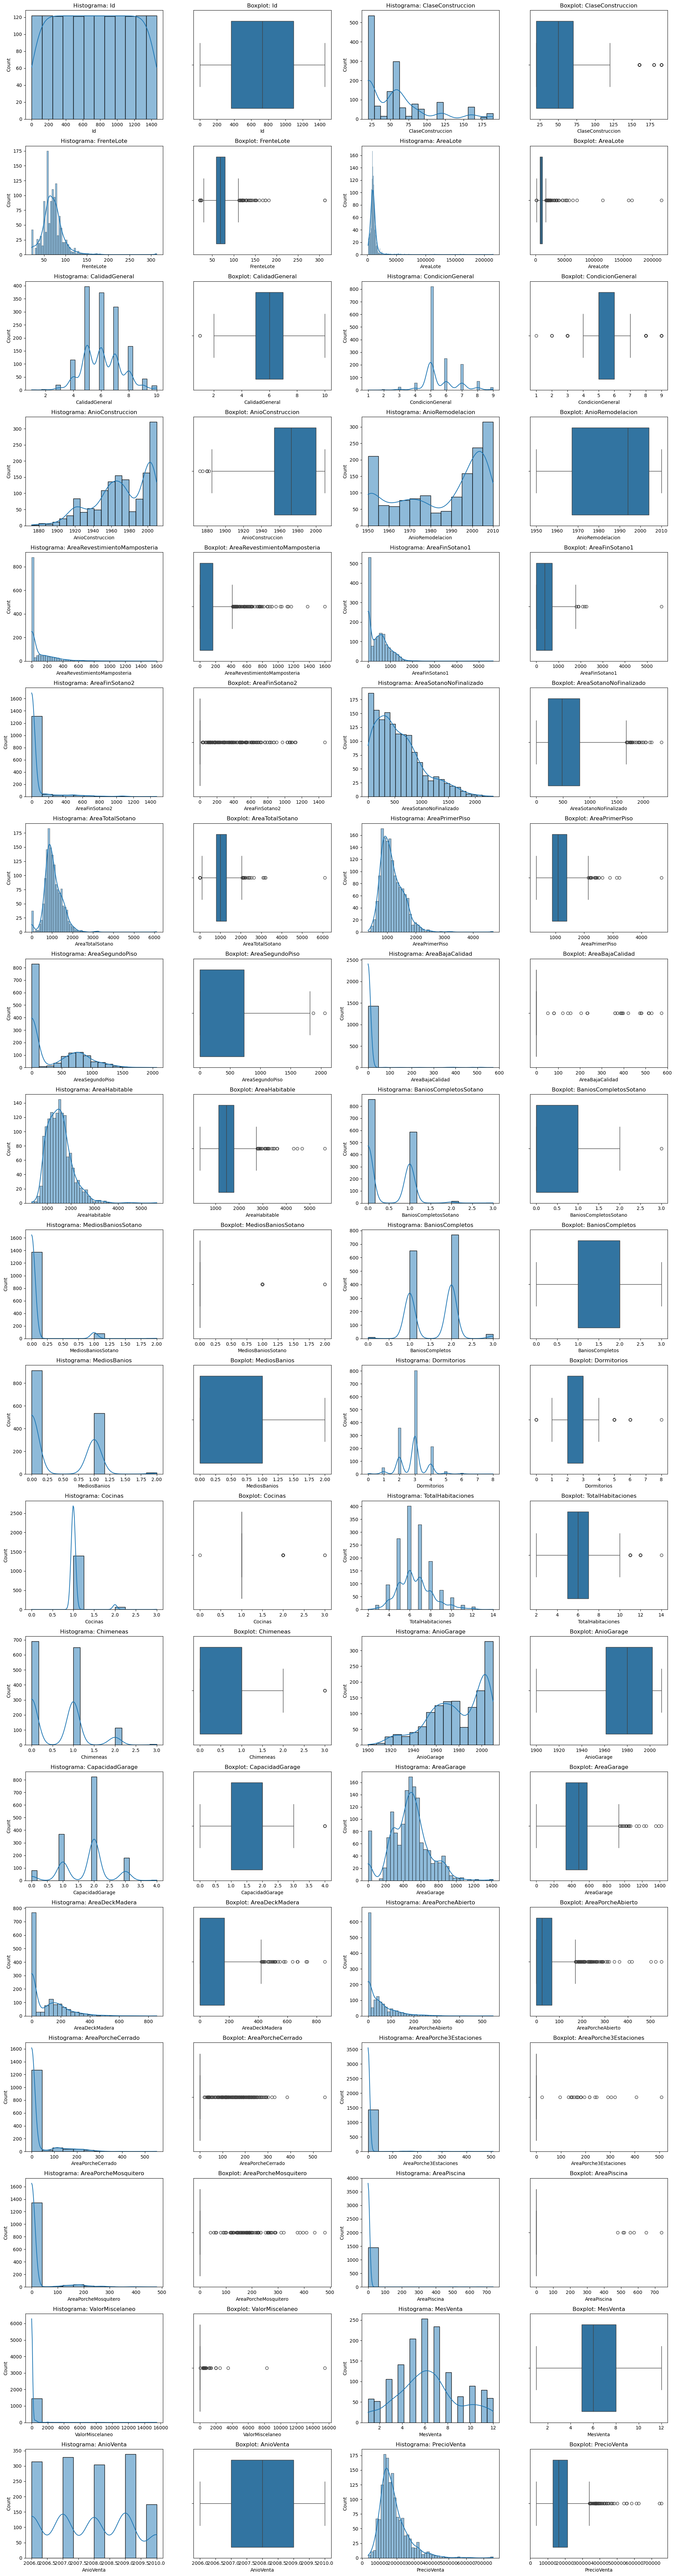

In [ ]:

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar la cantidad de subplots (cada columna tendrá histograma y boxplot)
n_cols = 4
n_rows = int(np.ceil(len(num_cols) * 2 / n_cols))  # 2 gráficos por columna

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Histograma
    sns.histplot(df[col].dropna(), kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histograma: {col}')

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Boxplot: {col}')

# Eliminar ejes vacíos
for j in range(2*len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Pregunta 3: Tratamiento de valores nulos [0.5 pts.]

**Nota:** Si su dataset no tiene valores nulos, esta pregunta no tendrá puntaje asignado.

Respuesta

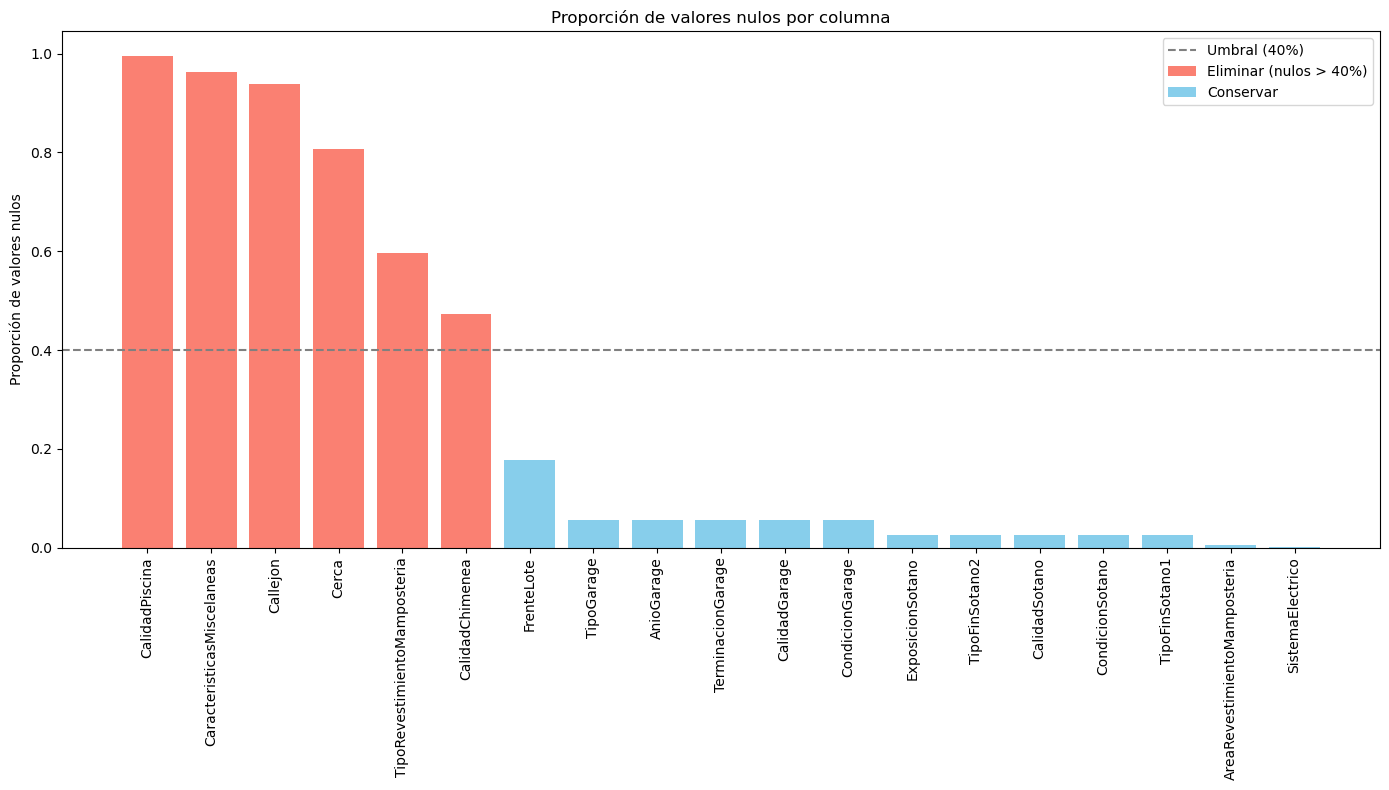

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular proporción de valores nulos
null_ratios = df.isnull().mean()

# Filtrar columnas que tengan al menos un nulo
null_ratios = null_ratios[null_ratios > 0]

# Orden descendente
null_ratios = null_ratios.sort_values(ascending=False)

# Umbral para eliminación
umbral = 0.4
cols_a_eliminar = null_ratios[null_ratios > umbral]
cols_a_conservar = null_ratios[null_ratios <= umbral]

# Graficar
plt.figure(figsize=(14, 8))

# Barras por encima del umbral (en rojo)
plt.bar(cols_a_eliminar.index, cols_a_eliminar.values, label='Eliminar (nulos > 40%)', color='salmon')

# Barras por debajo o igual al umbral (en azul)
plt.bar(cols_a_conservar.index, cols_a_conservar.values, label='Conservar', color='skyblue')

# Líneas y etiquetas
plt.axhline(y=umbral, color='gray', linestyle='--', label=f'Umbral ({umbral*100:.0f}%)')
plt.xticks(rotation=90)
plt.ylabel('Proporción de valores nulos')
plt.title('Proporción de valores nulos por columna')
plt.legend()
plt.tight_layout()
plt.show()


### 🔧 Estrategia eliminacion de columnas por valores nulos:
Si una columna tiene más del 40-50% de valores nulos, se considera candidata a eliminación, ya que imputarla conlleva mucho sesgo o ruido. 

In [75]:
cols_a_eliminar

CalidadPiscina                  0.995205
CaracteristicasMiscelaneas      0.963014
Callejon                        0.937671
Cerca                           0.807534
TipoRevestimientoMamposteria    0.597260
CalidadChimenea                 0.472603
dtype: float64

In [76]:
tipos_cols_conservar = df[cols_a_conservar.index].dtypes
print('✅ Tipos de columnas con valores nulos a inputar:')
print(tipos_cols_conservar)



✅ Tipos de columnas con valores nulos a inputar:
FrenteLote                      float64
TipoGarage                       object
AnioGarage                      float64
TerminacionGarage                object
CalidadGarage                    object
CondicionGarage                  object
ExposicionSotano                 object
TipoFinSotano2                   object
CalidadSotano                    object
CondicionSotano                  object
TipoFinSotano1                   object
AreaRevestimientoMamposteria    float64
SistemaElectrico                 object
dtype: object


✅ Estrategia de imputación y justificación por columna:
| Columna                        | Tipo    | Estrategia de imputación | Justificación                                                      |
| ------------------------------ | ------- | ------------------------ | ------------------------------------------------------------------ |
| `FrenteLote`                   | float64 | Mediana                  | Es una medida física continua → mediana evita sesgo por outliers.  |
| `TipoGarage`                   | object  | 'SinGarage'              | Si es nulo, indica que no hay garage.                              |
| `AnioGarage`                   | float64 | 0                        | Si no hay garage, no hay año de construcción.                      |
| `TerminacionGarage`            | object  | 'SinGarage'              | Ausencia → no aplica terminación.                                  |
| `CalidadGarage`                | object  | 'SinGarage'              | No aplica si no hay garage.                                        |
| `CondicionGarage`              | object  | 'SinGarage'              | Idem anterior.                                                     |
| `ExposicionSotano`             | object  | 'SinSotano'              | Si no hay exposición, probablemente no hay sótano.                 |
| `TipoFinSotano2`               | object  | 'SinTerminacion'         | Algunos sótanos solo tienen un acabado → segundo nulo = no existe. |
| `CalidadSotano`                | object  | 'SinSotano'              | Si es nulo, no hay sótano o no terminado.                          |
| `CondicionSotano`              | object  | 'SinSotano'              | Igual que anterior.                                                |
| `TipoFinSotano1`               | object  | 'SinTerminacion'         | Si no tiene terminación, nulo indica falta de acabado.             |
| `AreaRevestimientoMamposteria` | float64 | 0                        | Si no hay revestimiento, entonces área = 0.                        |
| `SistemaElectrico`             | object  | moda     | Usar moda (valor más frecuente).        |


### 🔧 Estrategia eliminacion de columnas por baja correlacion con la Variable Objetivo (PrecioVenta):


---
# Fase 2: Ingeniería de Features (1.5 pts.)

In [77]:
# Imputación numérica
df['FrenteLote'] = df['FrenteLote'].fillna(df['FrenteLote'].median())
df['AnioGarage'] = df['AnioGarage'].fillna(0)
df['AreaRevestimientoMamposteria'] = df['AreaRevestimientoMamposteria'].fillna(0)

# Imputación categórica
df['TipoGarage'] = df['TipoGarage'].fillna('SinGarage')
df['TerminacionGarage'] = df['TerminacionGarage'].fillna('SinGarage')
df['CalidadGarage'] = df['CalidadGarage'].fillna('SinGarage')
df['CondicionGarage'] = df['CondicionGarage'].fillna('SinGarage')

df['ExposicionSotano'] = df['ExposicionSotano'].fillna('SinSotano')
df['TipoFinSotano1'] = df['TipoFinSotano1'].fillna('SinTerminacion')
df['TipoFinSotano2'] = df['TipoFinSotano2'].fillna('SinTerminacion')
df['CalidadSotano'] = df['CalidadSotano'].fillna('SinSotano')
df['CondicionSotano'] = df['CondicionSotano'].fillna('SinSotano')

# Para sistema eléctrico, usa moda (valor más frecuente)
df['SistemaElectrico'] = df['SistemaElectrico'].fillna(df['SistemaElectrico'].mode()[0])

print(df)

        Id  ClaseConstruccion Zonificacion  FrenteLote  AreaLote TipoCalle  \
0        1                 60           RL        65.0      8450      Pave   
1        2                 20           RL        80.0      9600      Pave   
2        3                 60           RL        68.0     11250      Pave   
3        4                 70           RL        60.0      9550      Pave   
4        5                 60           RL        84.0     14260      Pave   
...    ...                ...          ...         ...       ...       ...   
1455  1456                 60           RL        62.0      7917      Pave   
1456  1457                 20           RL        85.0     13175      Pave   
1457  1458                 70           RL        66.0      9042      Pave   
1458  1459                 20           RL        68.0      9717      Pave   
1459  1460                 20           RL        75.0      9937      Pave   

     Callejon FormaLote ContornoTerreno Servicios  ... AreaPisc

In [78]:
# Eliminar del DataFrame
df = df.drop(columns=cols_a_eliminar.index)

In [79]:
print(df.isnull().sum())

Id                   0
ClaseConstruccion    0
Zonificacion         0
FrenteLote           0
AreaLote             0
                    ..
MesVenta             0
AnioVenta            0
TipoVenta            0
CondicionVenta       0
PrecioVenta          0
Length: 75, dtype: int64


In [80]:
df.columns

Index(['Id', 'ClaseConstruccion', 'Zonificacion', 'FrenteLote', 'AreaLote',
       'TipoCalle', 'FormaLote', 'ContornoTerreno', 'Servicios',
       'ConfiguracionLote', 'PendienteTerreno', 'Barrio', 'Condicion1',
       'Condicion2', 'TipoEdificio', 'EstiloCasa', 'CalidadGeneral',
       'CondicionGeneral', 'AnioConstruccion', 'AnioRemodelacion',
       'EstiloTecho', 'MaterialTecho', 'Exterior1', 'Exterior2',
       'AreaRevestimientoMamposteria', 'CalidadExterior', 'CondicionExterior',
       'Cimentacion', 'CalidadSotano', 'CondicionSotano', 'ExposicionSotano',
       'TipoFinSotano1', 'AreaFinSotano1', 'TipoFinSotano2', 'AreaFinSotano2',
       'AreaSotanoNoFinalizado', 'AreaTotalSotano', 'SistemaCalefaccion',
       'CalidadCalefaccion', 'AireAcondicionadoCentral', 'SistemaElectrico',
       'AreaPrimerPiso', 'AreaSegundoPiso', 'AreaBajaCalidad', 'AreaHabitable',
       'BaniosCompletosSotano', 'MediosBaniosSotano', 'BaniosCompletos',
       'MediosBanios', 'Dormitorios', 'Cocinas

📉 Columnas con baja correlación con PrecioVenta (|corr| < 0.05):

AnioVenta               -0.028923
AreaBajaCalidad         -0.025606
Id                      -0.021917
ValorMiscelaneo         -0.021190
MediosBaniosSotano      -0.016844
AreaFinSotano2          -0.011378
AreaPorche3Estaciones    0.044584
MesVenta                 0.046432
Name: PrecioVenta, dtype: float64

✅ Columnas con correlación significativa (|corr| ≥ 0.05):

CalidadGeneral                  0.790982
AreaHabitable                   0.708624
CapacidadGarage                 0.640409
AreaGarage                      0.623431
AreaTotalSotano                 0.613581
AreaPrimerPiso                  0.605852
BaniosCompletos                 0.560664
TotalHabitaciones               0.533723
AnioConstruccion                0.522897
AnioRemodelacion                0.507101
AreaRevestimientoMamposteria    0.472614
Chimeneas                       0.466929
AreaFinSotano1                  0.386420
FrenteLote                      0.3

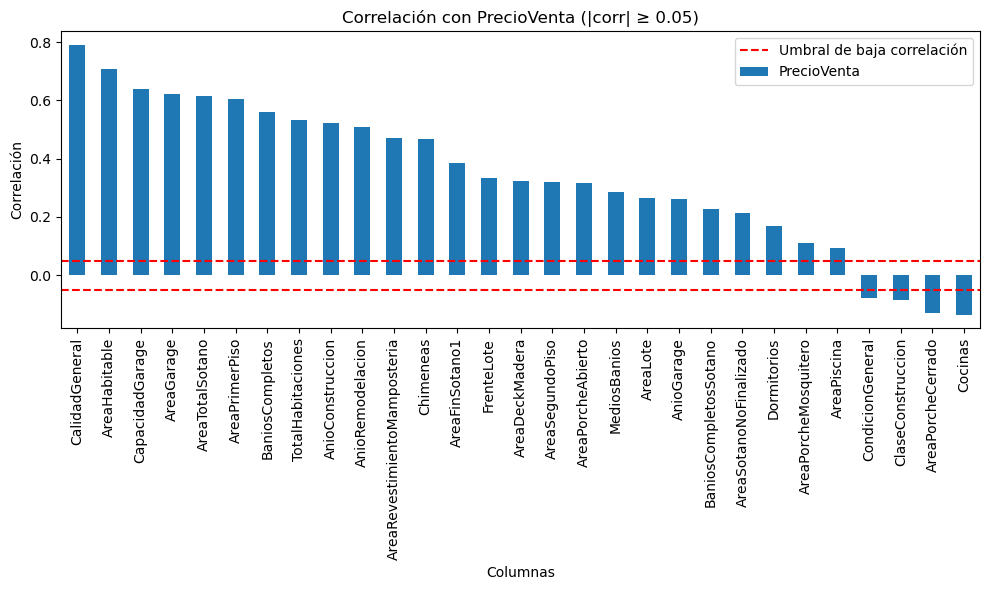

In [81]:
import pandas as pd
import numpy as np

# 1. Seleccionar columnas numéricas (automáticamente excluye object/categorical)
df_numericas = df.select_dtypes(include=[np.number])

# 2. Calcular la correlación con PrecioVenta
correlaciones = df_numericas.corr()['PrecioVenta'].drop('PrecioVenta')

# 3. Definir umbral de baja correlación
umbral = 0.05
baja_corr = correlaciones[correlaciones.abs() < umbral]
alta_corr = correlaciones[correlaciones.abs() >= umbral]

# 4. Imprimir resultados
print("📉 Columnas con baja correlación con PrecioVenta (|corr| < {:.2f}):\n".format(umbral))
print(baja_corr.sort_values())

print("\n✅ Columnas con correlación significativa (|corr| ≥ {:.2f}):\n".format(umbral))
print(alta_corr.sort_values(ascending=False))
# 5. Graficar correlaciones significativas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
correlaciones[correlaciones.abs() >= umbral].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación con PrecioVenta (|corr| ≥ {:.2f})'.format(umbral))
plt.ylabel('Correlación')
plt.xlabel('Columnas')
plt.axhline(y=umbral, color='red', linestyle='--', label='Umbral de baja correlación')
plt.axhline(y=-umbral, color='red', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()
# 6. Guardar DataFrame limpio
# df.to_csv('train_limpio.csv', index=False)

In [82]:
baja_corr

Id                      -0.021917
AreaFinSotano2          -0.011378
AreaBajaCalidad         -0.025606
MediosBaniosSotano      -0.016844
AreaPorche3Estaciones    0.044584
ValorMiscelaneo         -0.021190
MesVenta                 0.046432
AnioVenta               -0.028923
Name: PrecioVenta, dtype: float64

## Pregunta 4: Selección de columnas [0.5 pts]

En base en el análisis exploratorio y la matriz de correlación, se decidió eliminar las siguientes columnas:

In [83]:
# Eliminar columnas con baja correlación
df = df.drop(columns=baja_corr.index)
# Verificar columnas restantes
print("✅ Columnas restantes tras eliminar baja correlación:")
print(df.columns)


✅ Columnas restantes tras eliminar baja correlación:
Index(['ClaseConstruccion', 'Zonificacion', 'FrenteLote', 'AreaLote',
       'TipoCalle', 'FormaLote', 'ContornoTerreno', 'Servicios',
       'ConfiguracionLote', 'PendienteTerreno', 'Barrio', 'Condicion1',
       'Condicion2', 'TipoEdificio', 'EstiloCasa', 'CalidadGeneral',
       'CondicionGeneral', 'AnioConstruccion', 'AnioRemodelacion',
       'EstiloTecho', 'MaterialTecho', 'Exterior1', 'Exterior2',
       'AreaRevestimientoMamposteria', 'CalidadExterior', 'CondicionExterior',
       'Cimentacion', 'CalidadSotano', 'CondicionSotano', 'ExposicionSotano',
       'TipoFinSotano1', 'AreaFinSotano1', 'TipoFinSotano2',
       'AreaSotanoNoFinalizado', 'AreaTotalSotano', 'SistemaCalefaccion',
       'CalidadCalefaccion', 'AireAcondicionadoCentral', 'SistemaElectrico',
       'AreaPrimerPiso', 'AreaSegundoPiso', 'AreaHabitable',
       'BaniosCompletosSotano', 'BaniosCompletos', 'MediosBanios',
       'Dormitorios', 'Cocinas', 'CalidadC

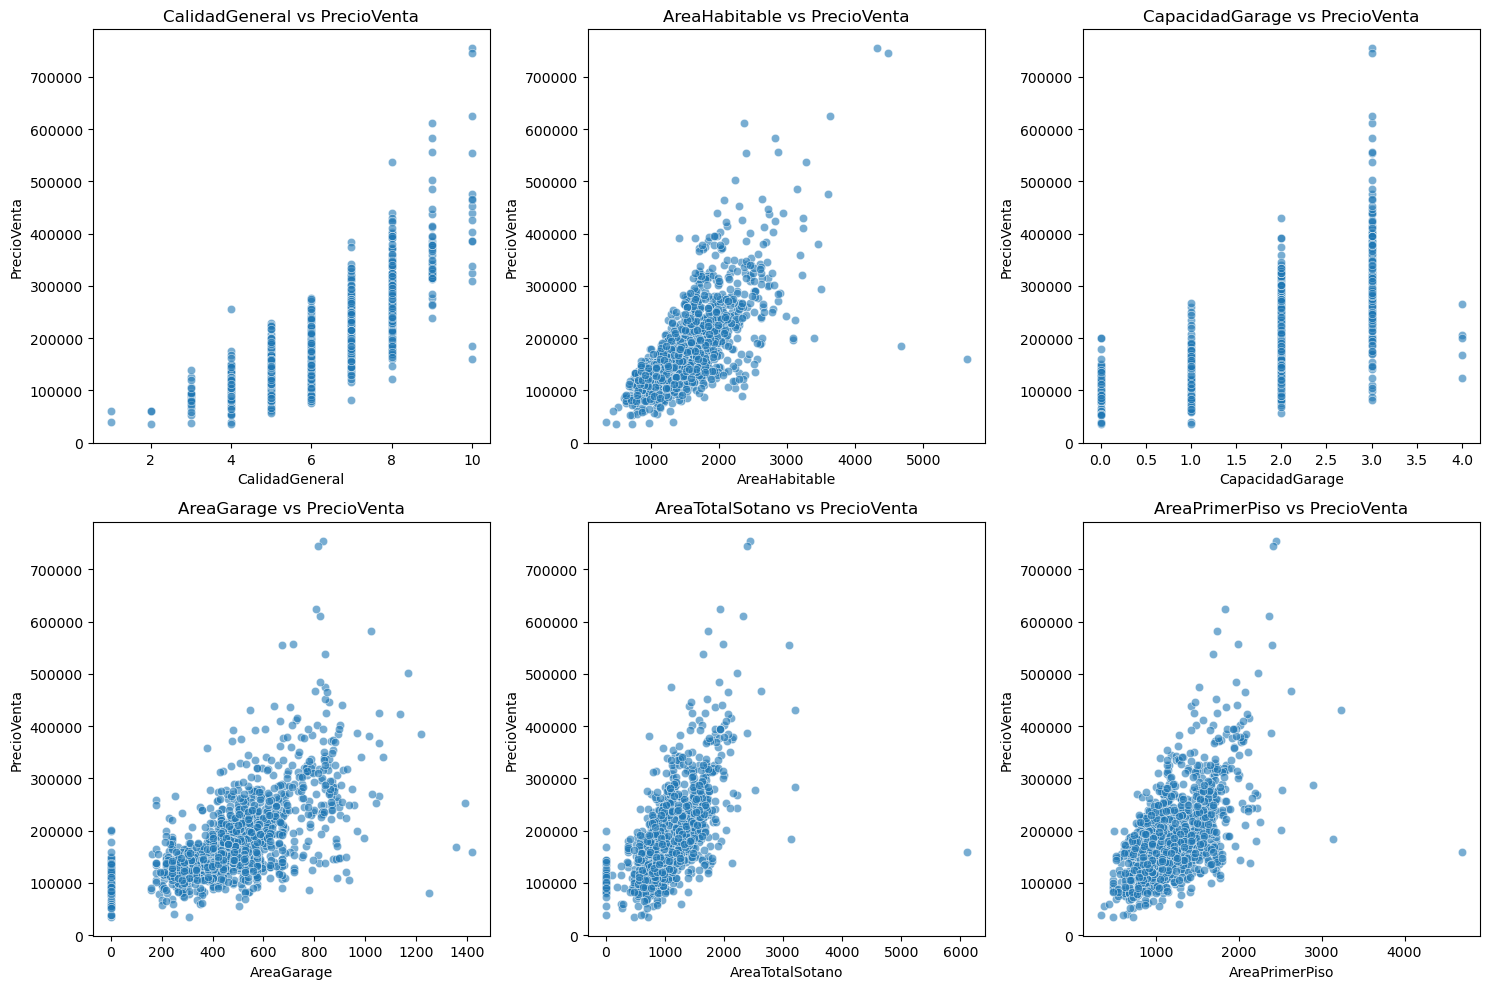

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlaciones con PrecioVenta
df_numericas = df.select_dtypes(include=[np.number])
correlaciones = df_numericas.corr()['PrecioVenta'].drop('PrecioVenta')

# Tomar las 6 con mayor correlación absoluta
top_corr = correlaciones.abs().sort_values(ascending=False).head(6).index

# Graficar scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_corr, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['PrecioVenta'], alpha=0.6)
    plt.title(f'{col} vs PrecioVenta')
    plt.xlabel(col)
    plt.ylabel('PrecioVenta')

plt.tight_layout()
plt.show()


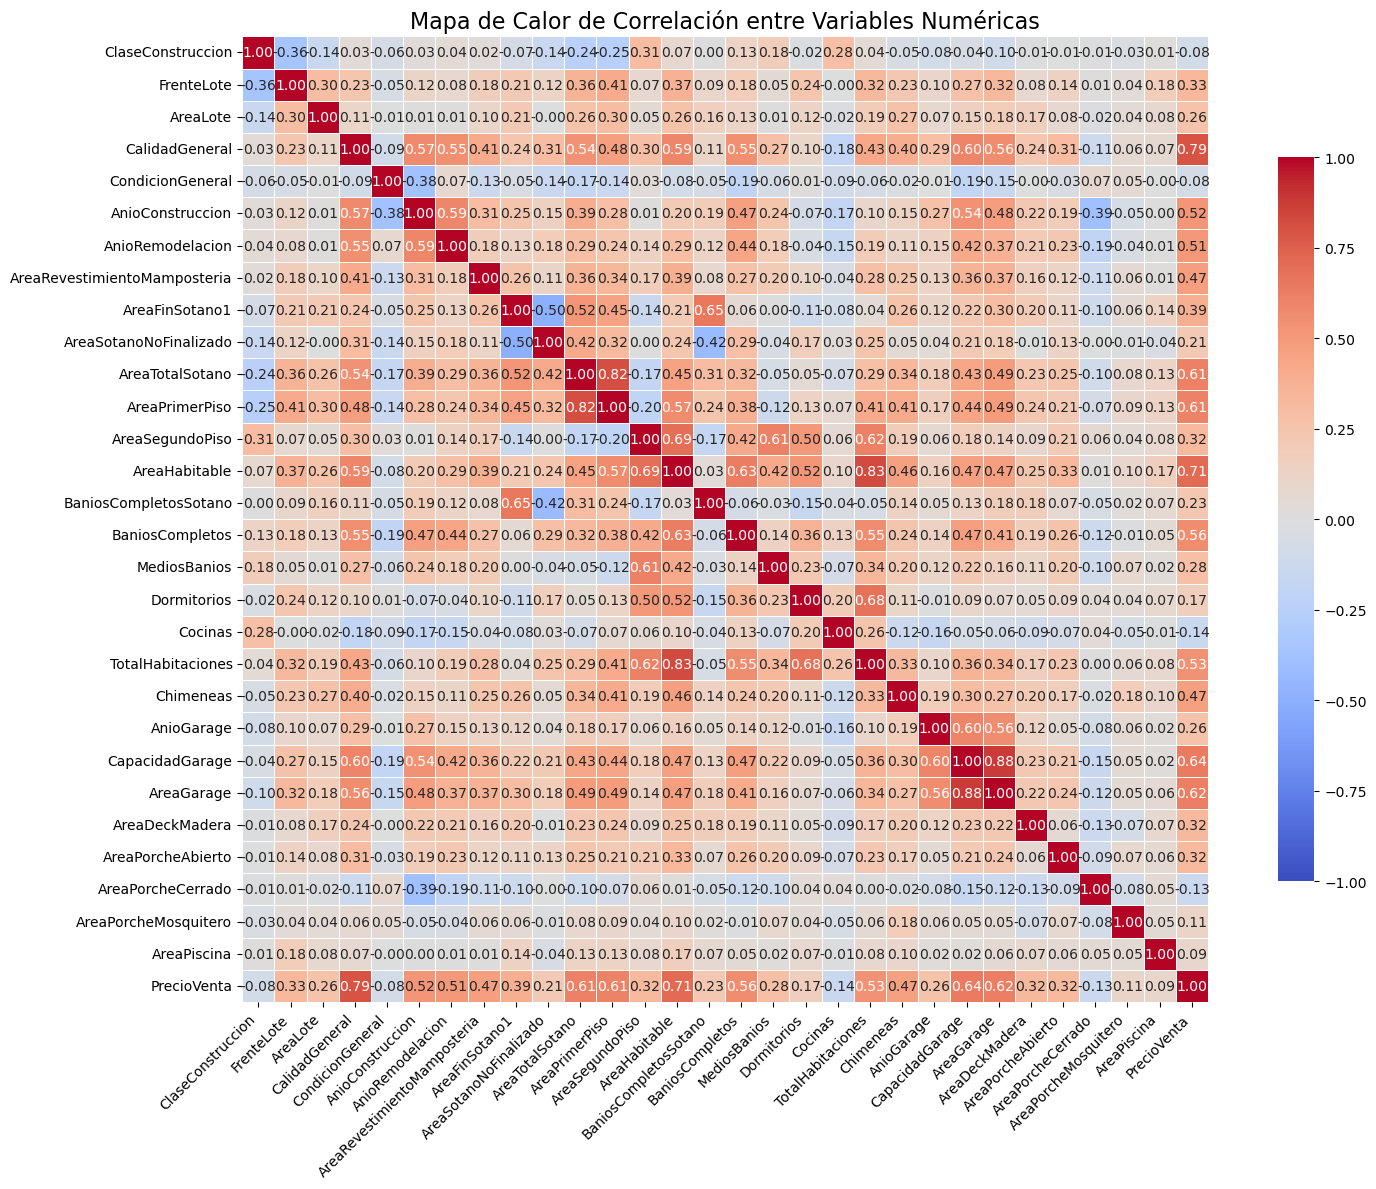

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo columnas numéricas
df_numericas = df.select_dtypes(include=[np.number])

# Calculamos la matriz de correlaciones
matriz_correlacion = df_numericas.corr()

# Tamaño del gráfico
plt.figure(figsize=(16, 12))

# Heatmap con anotaciones
sns.heatmap(
    matriz_correlacion,
    annot=True,              # muestra valores
    fmt=".2f",               # dos decimales
    cmap='coolwarm',         # colores
    vmin=-1, vmax=1,         # escala de correlación
    linewidths=0.5,          # separación entre celdas
    square=True,             # celdas cuadradas
    cbar_kws={"shrink": 0.75} # tamaño de la barra de color
)

plt.title("Mapa de Calor de Correlación entre Variables Numéricas", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [86]:
df.shape

(1460, 67)

In [87]:
df.shape

(1460, 67)

/Users/fantperezc/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fantperezc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


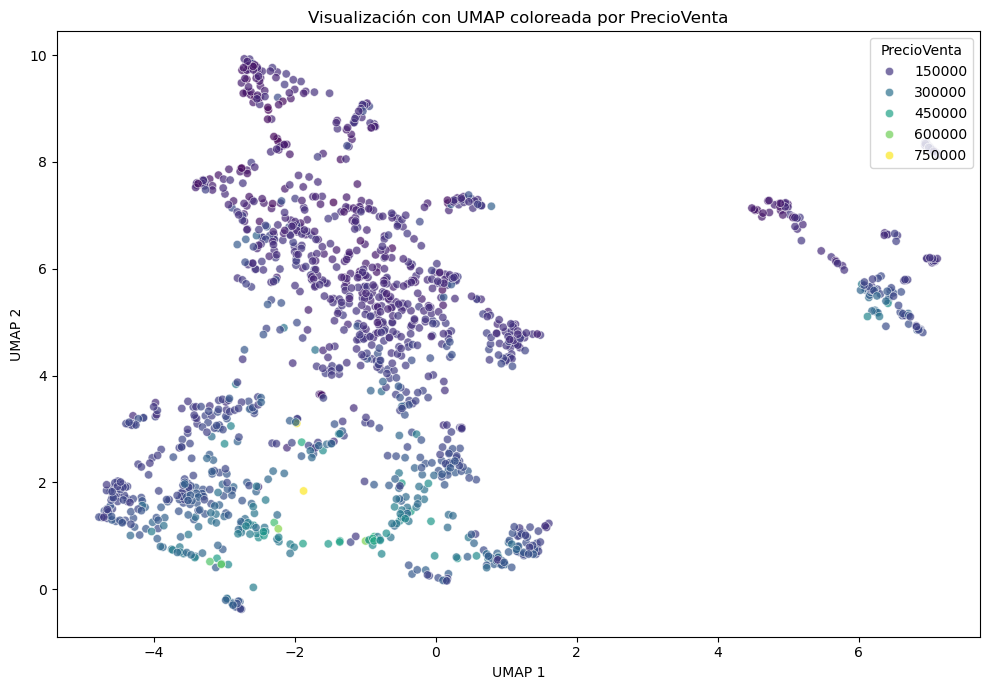

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP

# 1. Separa columnas a conservar
X_raw = df[df.columns.difference(['PrecioVenta'])]
y = df['PrecioVenta']

# 2. Codifica columnas categóricas
cat_cols = X_raw.select_dtypes(include='object').columns
num_cols = X_raw.select_dtypes(exclude='object').columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_raw[cat_cols]), columns=cat_cols, index=X_raw.index)

# 3. Combina numéricas y categóricas codificadas
X = pd.concat([X_raw[num_cols], X_cat_encoded], axis=1)

# 4. Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Aplicar UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# 6. Graficar
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('Visualización con UMAP coloreada por PrecioVenta')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='PrecioVenta', loc='upper right')
plt.tight_layout()
plt.show()


In [89]:
top_corr.get_indexer_non_unique

<bound method Index.get_indexer_non_unique of Index(['CalidadGeneral', 'AreaHabitable', 'CapacidadGarage', 'AreaGarage',
       'AreaTotalSotano', 'AreaPrimerPiso'],
      dtype='object')>

## Pregunta 5: Análisis por visualización de datos [1.0 pts.]

**Técnicas disponibles:** PCA, t-SNE, UMAP

Respuesta

/Users/fantperezc/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/fantperezc/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fantperezc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


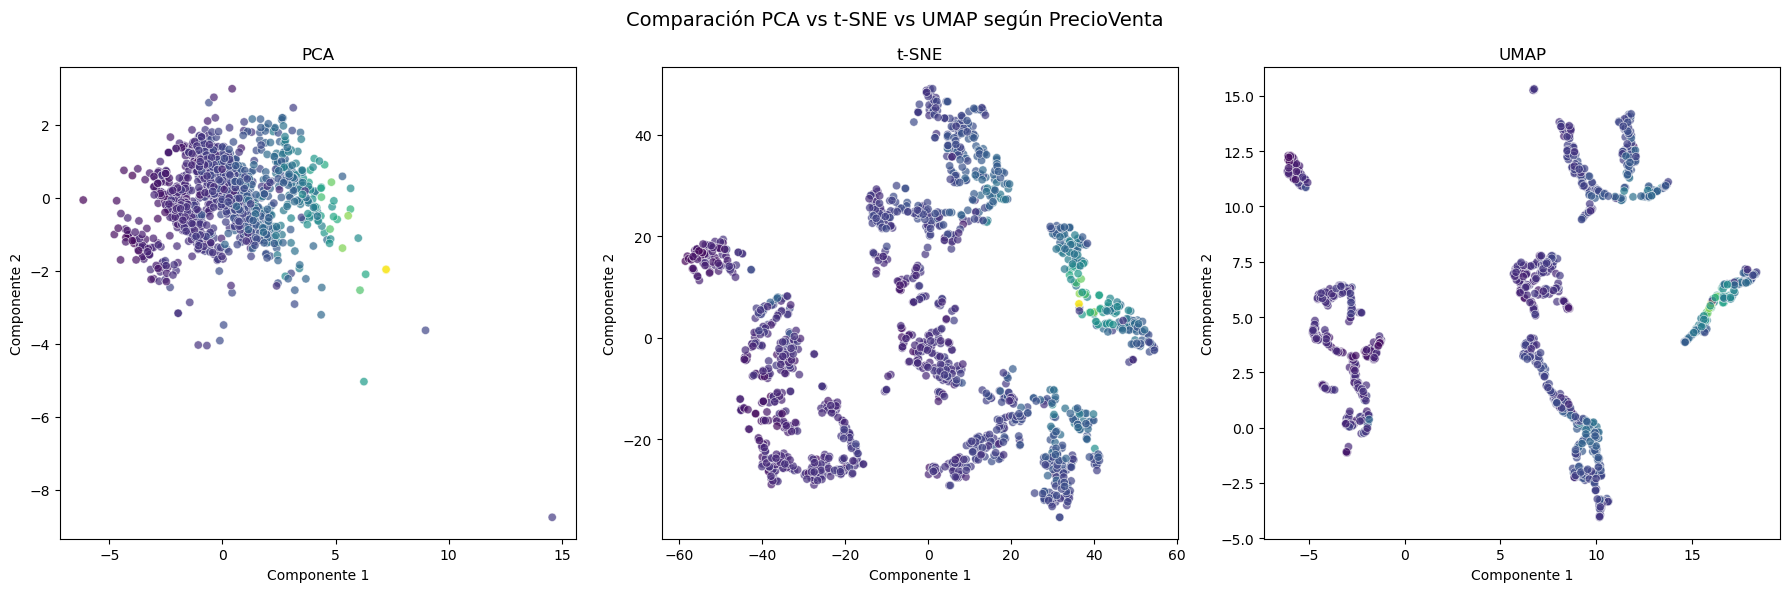

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

columnas_top_correlacion = [
    'CalidadGeneral', 'AreaHabitable', 'CapacidadGarage', 'AreaGarage','AreaTotalSotano', 'AreaPrimerPiso'
]
df_top_corr = df[columnas_top_correlacion + ['PrecioVenta']].copy()
# 1. Preparar los datos
y = df_top_corr['PrecioVenta']
X = df_top_corr.drop(columns=['PrecioVenta'])

# 2. One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 3. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# 5. Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', ax=axes[0], alpha=0.7)
axes[0].set_title('PCA')

# t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', ax=axes[1], alpha=0.7)
axes[1].set_title('t-SNE')

# UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', ax=axes[2], alpha=0.7)
axes[2].set_title('UMAP')

# Ajustes generales
for ax in axes:
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.legend([],[], frameon=False)  # Oculta la leyenda repetida

plt.suptitle('Comparación PCA vs t-SNE vs UMAP según PrecioVenta', fontsize=14)
plt.tight_layout()
plt.show()


/Users/fantperezc/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/fantperezc/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fantperezc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


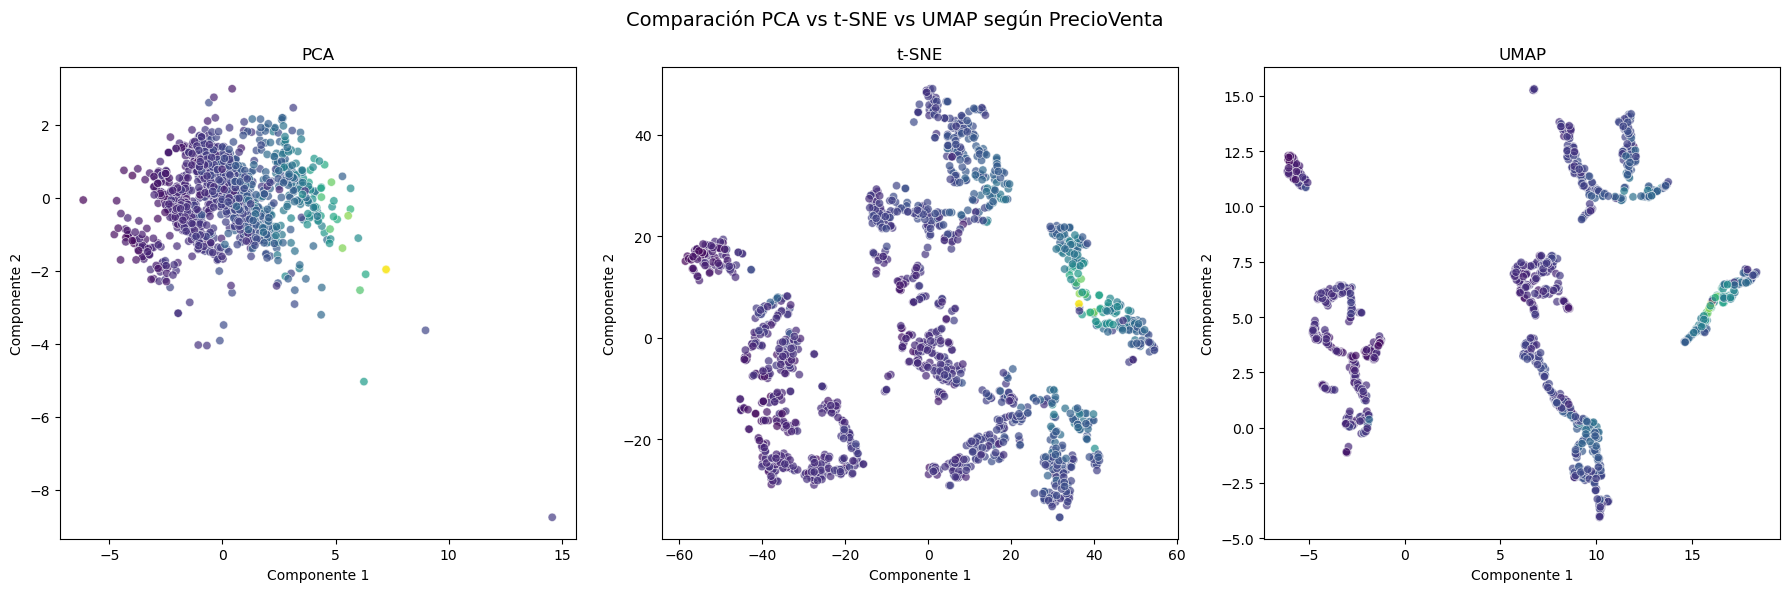

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
'''
# 1. Preparar los datos
y = df['PrecioVenta']
X = df.drop(columns=['PrecioVenta'])

# 2. One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 3. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
'''
# 4. Reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# 5. Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', ax=axes[0], alpha=0.7)
axes[0].set_title('PCA')

# t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', ax=axes[1], alpha=0.7)
axes[1].set_title('t-SNE')

# UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', ax=axes[2], alpha=0.7)
axes[2].set_title('UMAP')

# Ajustes generales
for ax in axes:
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.legend([],[], frameon=False)  # Oculta la leyenda repetida

plt.suptitle('Comparación PCA vs t-SNE vs UMAP según PrecioVenta', fontsize=14)
plt.tight_layout()
plt.show()


---
# Fase 3: Modelado y Evaluación (4 pts.)

## Pregunta 6: Partición de datos [0.5 pts.]

Respuesta

In [92]:
# Completar
df.shape

(1460, 67)

#### ✅ Recomendación general

**📌 Porcentaje de división**

* Entrenamiento: 80%
* Evaluación (test): 20%

Esta proporción es una práctica estándar cuando tienes un tamaño de muestra razonable como 1460 filas.

**Justificación:**

* 80% permite entrenar con suficiente información (1168 muestras aprox).
* 20% es representativo para una evaluación confiable (292 muestras aprox).
* Minimiza el overfitting y garantiza una evaluación justa.

In [93]:
from sklearn.model_selection import train_test_split

# Suponiendo que ya separaste X e y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% para test
    random_state=RNG_SEED      # para reproducibilidad
)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 6), (292, 6), (1168,), (292,))

## Pregunta 7: Predicción con modelos de ML [2 pts.]

**Modelos disponibles:** KNN, SVM, Árboles de Decisión, Random Forest, Gradient Boosting, MLP

Respuesta

In [95]:
# ✅ Entrenamiento de modelos y evaluación

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar modelos
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenamiento
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_pred_gb = gb.predict(X_test_scaled)

# Evaluación
def evaluar_modelo(nombre, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5  # sqrt for RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"📊 Resultados de {nombre}:")
    print(f"MAE :  {mae:.2f}")
    print(f"RMSE:  {rmse:.2f}")
    print(f"R²   :  {r2:.2f}\n")

evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("Gradient Boosting", y_test, y_pred_gb)


📊 Resultados de Random Forest:
MAE :  20171.85
RMSE:  30626.08
R²   :  0.88

📊 Resultados de Gradient Boosting:
MAE :  19949.69
RMSE:  30600.00
R²   :  0.88



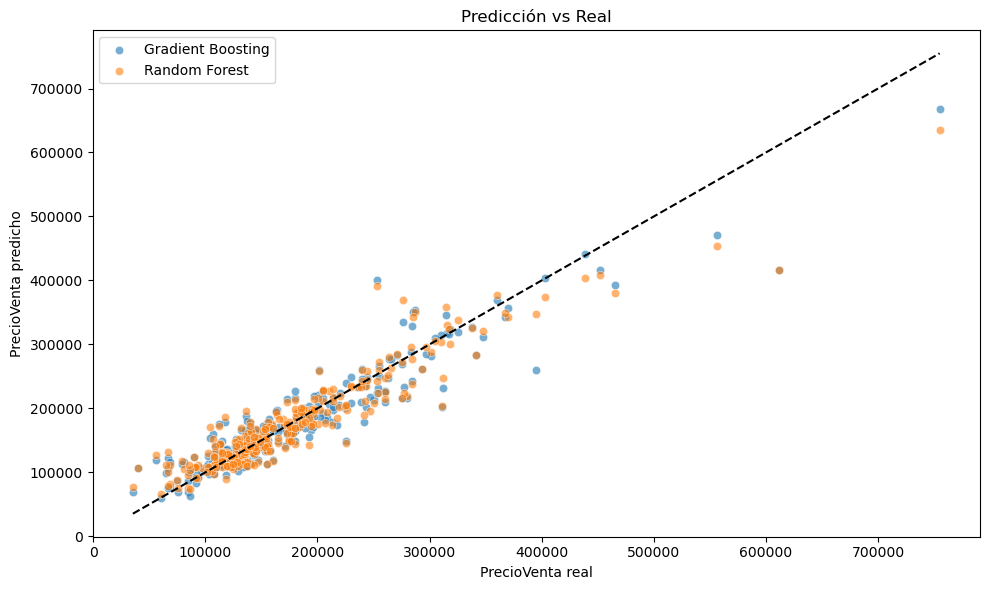

In [96]:
# ✅ Gráfico de Predicción vs Real

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6, label='Gradient Boosting')
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('PrecioVenta real')
plt.ylabel('PrecioVenta predicho')
plt.title('Predicción vs Real')
plt.legend()
plt.tight_layout()
plt.show()


## Pregunta 8: Sobreentrenamiento [1.5 pts.]

Respuesta

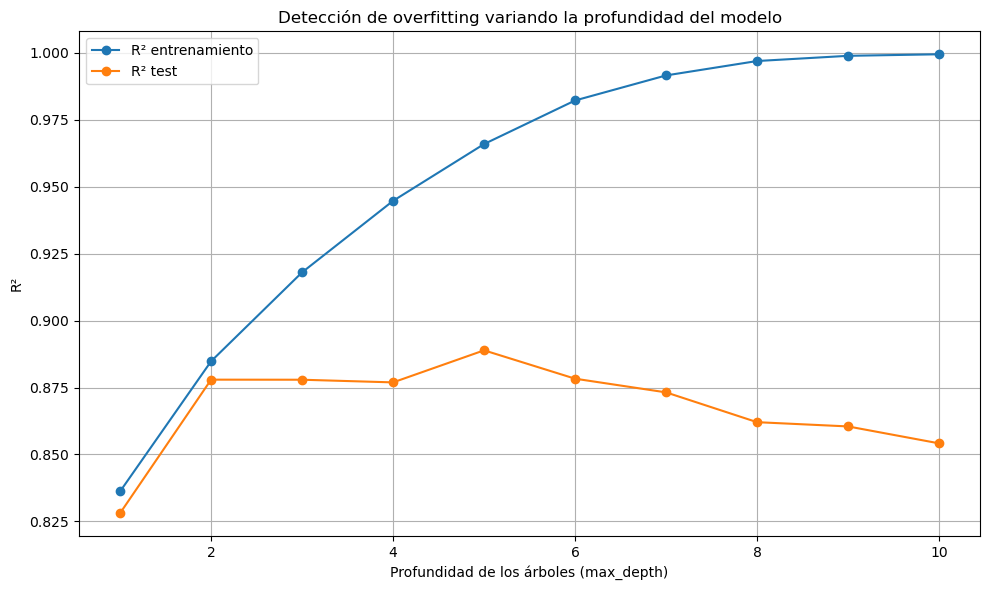

In [97]:
# Completar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Rango de complejidad: profundidad de árbol
depths = range(1, 11)
r2_train = []
r2_test = []

for depth in depths:
    model = GradientBoostingRegressor(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(depths, r2_train, marker='o', label='R² entrenamiento')
plt.plot(depths, r2_test, marker='o', label='R² test')
plt.xlabel('Profundidad de los árboles (max_depth)')
plt.ylabel('R²')
plt.title('Detección de overfitting variando la profundidad del modelo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


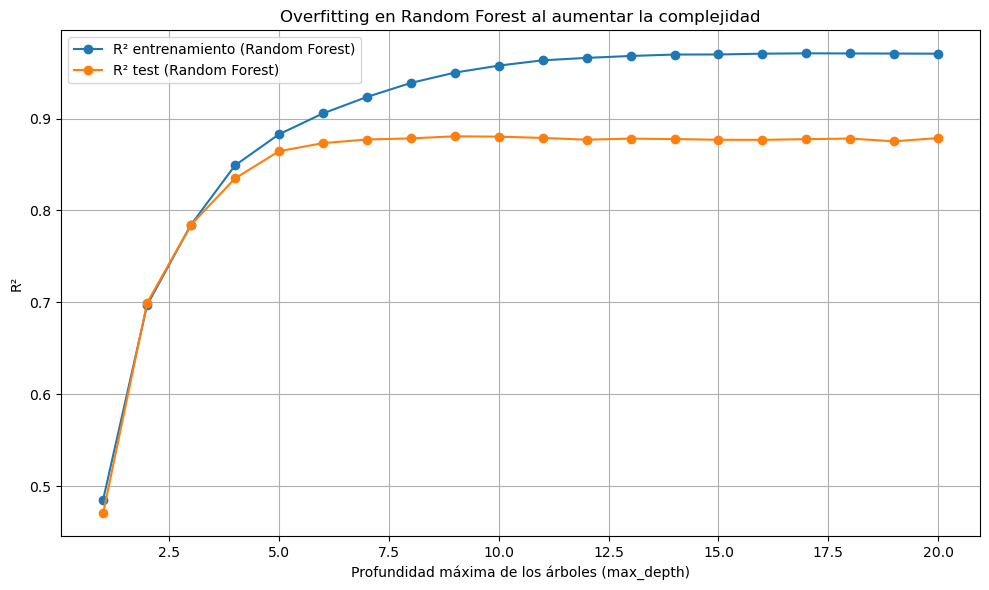

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Rango de valores para max_depth
depths = range(1, 21)  # probamos con más profundidad para ver el efecto más claro
r2_train_rf = []
r2_test_rf = []

for depth in depths:
    model_rf = RandomForestRegressor(max_depth=depth, n_estimators=100, random_state=42)
    model_rf.fit(X_train_scaled, y_train)

    y_train_pred_rf = model_rf.predict(X_train_scaled)
    y_test_pred_rf = model_rf.predict(X_test_scaled)

    r2_train_rf.append(r2_score(y_train, y_train_pred_rf))
    r2_test_rf.append(r2_score(y_test, y_test_pred_rf))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(depths, r2_train_rf, marker='o', label='R² entrenamiento (Random Forest)')
plt.plot(depths, r2_test_rf, marker='o', label='R² test (Random Forest)')
plt.xlabel('Profundidad máxima de los árboles (max_depth)')
plt.ylabel('R²')
plt.title('Overfitting en Random Forest al aumentar la complejidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
